# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

In [1]:
# Váš kód zde
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.kwargs = kwargs
        self.trees = []
        self.random_seed = 666
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        for _ in range(self.n_estimators):

            X_selected = X.sample(n=self.max_samples, replace=True, random_state=self.random_seed)
            y_selected = y.sample(n=self.max_samples, replace=True, random_state=self.random_seed)
            
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_selected, y_selected)
            
            self.trees.append(tree)
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        ypredicted = np.zeros((X.shape[0],))
        
        for tree in self.trees:
            ypredicted += tree.predict(X) # add 1 or 0 from each tree in forest
        
        ypredicted /= self.n_estimators # get real prediction from all trees
        return ypredicted
  

Načtení datasetu a rozdělení na vysvětlovanou proměnnou a příznaky. Následně provedeme rozdělení na trénovací, validační a testovací množinu.

In [2]:
import pandas as pd

data = pd.read_csv('data.csv')
X = data.drop('Life expectancy', axis=1)
y = data['Life expectancy']

In [3]:
from sklearn.model_selection import train_test_split

random_seed = 666

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25, random_state=random_seed)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=random_seed)

In [4]:
print("Velikost trénovací množiny:", len(Xtrain))
print("Velikost validační množiny:", len(Xval))
print("Velikost testovací množiny:", len(Xtest))

Velikost trénovací množiny: 1528
Velikost validační množiny: 510
Velikost testovací množiny: 680


## Analýza datasetu

Podívejme se na null hodnoty a ty odstraníme. Sloupce obsahující NaN hodnoty jsou pouze typu float.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

display(Xtrain.info())
columns_with_null = data.columns[data.isnull().any()].tolist()
columns_with_null_dtype = data[data.columns[data.isnull().any()]].dtypes
print("Dtype sloupců s null hodnotami:")
print(columns_with_null_dtype)

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 2028 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1528 non-null   object 
 1   Year                             1528 non-null   int64  
 2   Status                           1528 non-null   object 
 3   Adult Mortality                  1528 non-null   float64
 4   infant deaths                    1528 non-null   int64  
 5   Alcohol                          1453 non-null   float64
 6   percentage expenditure           1528 non-null   float64
 7   Hepatitis B                      1227 non-null   float64
 8   Measles                          1528 non-null   int64  
 9   BMI                              1513 non-null   float64
 10  under-five deaths                1528 non-null   int64  
 11  Polio                            1522 non-null   float64
 12  Total expenditure      

None

Dtype sloupců s null hodnotami:
Alcohol                            float64
Hepatitis B                        float64
BMI                                float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object


### Nahrazení chybějících hodnot
Nahradíme NaN hodnoty medianem ze stejného státu. Pokud má stát pouze NaN hodnoty, výslednou hodnotu spočítáme pomocí medianu celého testovacího datasetu. 

In [6]:
def replace_nan_mean(dataset, column):
    # get mean values depending on training data a fill NaN with mean of this current country to get accurate value as possible
    # because for example alcohol in Czech republic and muslim country will not be as accurate as it could have been
    # if country whole column is null then replace it with mean from whole train data in this column
    
    mean_values = Xtrain.groupby('Country')[column].mean()
    overall_mean = Xtrain[column].mean()
    
    for country, mean_value in mean_values.items():
        if not pd.isnull(mean_value):
            mask = (dataset['Country'] == country) & (dataset[column].isnull())
            dataset.loc[mask, column] = mean_value
        else:
            mask = (dataset['Country'] == country) & (dataset[column].isnull())
            dataset.loc[mask, column] = overall_mean
        

Podle mého názoru nejsou potřeba názvy států k určení vysvětlované proměnné. Délku života počítáme na základě jiných příznaků, a tím pádem je tento sloupec vhodnější smazat.

In [7]:
for column_with_null in columns_with_null:
    replace_nan_mean(Xtrain, column_with_null)

Xtrain_copy = Xtrain.copy(deep=True) # save for later

for column_with_null in columns_with_null:
    replace_nan_mean(Xval, column_with_null)
    
for column_with_null in columns_with_null:
    replace_nan_mean(Xtest, column_with_null)
    
Xtrain = Xtrain.drop('Country', axis=1)
Xval = Xval.drop('Country', axis=1)
Xtest = Xtest.drop('Country', axis=1)

Zkontrolujeme jestli neco nechybí

In [10]:
display(Xtrain.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 2028 to 209
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1528 non-null   int64  
 1   Status                           1528 non-null   object 
 2   Adult Mortality                  1528 non-null   float64
 3   infant deaths                    1528 non-null   int64  
 4   Alcohol                          1528 non-null   float64
 5   percentage expenditure           1528 non-null   float64
 6   Hepatitis B                      1528 non-null   float64
 7   Measles                          1528 non-null   int64  
 8   BMI                              1528 non-null   float64
 9   under-five deaths                1528 non-null   int64  
 10  Polio                            1528 non-null   float64
 11  Total expenditure                1528 non-null   float64
 12  Diphtheria             

None

Status nabývá dvou hodnot. Můžeme tento přiznak převést na 0 nebo 1. 

In [11]:
Xtrain = pd.get_dummies(Xtrain, columns=['Status'], drop_first=True)
Xval = pd.get_dummies(Xval, columns=['Status'], drop_first=True)
Xtest = pd.get_dummies(Xtest, columns=['Status'], drop_first=True)

## Analýza kolinearity 

Z nasledujícího grafu a výstupu je vidět, ze některé proměnne jsou navzájem závislé. 

Podle informací, co jsem nasel na internetu, modely v tomto řešení jako RandomForest a AdaBoost nebudou z velké části tím ovlivněné. Zatím je nebudeme odstraňovat. 

[https://www.researchgate.net/post/Are-Random-Forests-affected-by-multi-collinearity-between-features](https://www.researchgate.net/post/Are-Random-Forests-affected-by-multi-collinearity-between-features)
[https://towardsdatascience.com/the-ultimate-guide-to-adaboost-random-forests-and-xgboost-7f9327061c4f#:~:text=They%20can%20handle%20mixed%20data,the%20correlations%20and%20interactions%20between](https://towardsdatascience.com/the-ultimate-guide-to-adaboost-random-forests-and-xgboost-7f9327061c4f#:~:text=They%20can%20handle%20mixed%20data,the%20correlations%20and%20interactions%20between)
[https://www.quora.com/Is-multicollinearity-a-problem-with-gradient-boosted-trees](https://www.quora.com/Is-multicollinearity-a-problem-with-gradient-boosted-trees)


Most Correlated Pairs:
[('infant deaths', 'under-five deaths')
 ('thinness  1-19 years', 'thinness 5-9 years')
 ('GDP', 'percentage expenditure')
 ('Income composition of resources', 'Schooling') ('Diphtheria', 'Polio')
 ('Population', 'infant deaths') ('Population', 'under-five deaths')
 ('Diphtheria', 'Hepatitis B')]


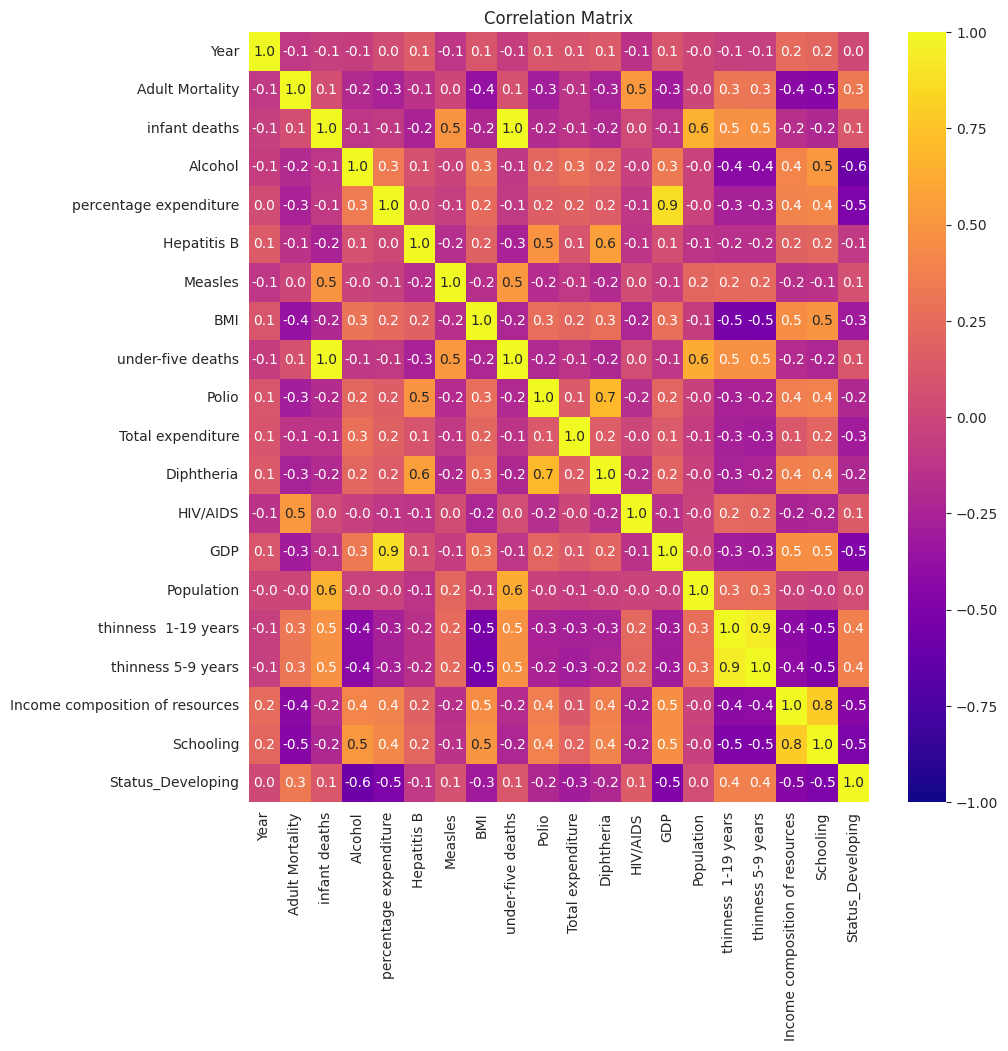

In [12]:
correlation_matrix = Xtrain.corr()

correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
most_correlated_pairs = correlation_pairs[correlation_pairs < 1].head(15)
most_correlated_features = most_correlated_pairs.index.to_frame(index=False)

unique_most_correlated_pairs = most_correlated_features.apply(lambda x: tuple(sorted(x)), axis=1).unique()

print("Most Correlated Pairs:")
print(unique_most_correlated_pairs)

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', vmin=-1, vmax=1, fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

## Random Forest
Hyperparametry
* n_estimators: určuje počet stromů v náhodném lese
* max_depth: určuje maximální hloubku stromů v lese
* max_samples: určuje počet vybraných vzorků z trénovací množiny

Přestože mohou být jednotlivé stromy samy o sobě slabými modely, jejich kolektivní rozhodování přináší až překvapivě dobré výsledky. Na rozdíl od rozhodovacích stromů jsou náhodné lesy velice robustní a relativně odolné vůči přeučení.

Náhodné lesy mají dobrou schopnost zachytit důležité příznaky. 

Také zkusíme udělat scaling dat podle MinMax a Standard algoritmů a v závislosti na RMSE vybereme nejlepší možnost. 

Poznámka: Při ladění hyperparametrů jsem si vybral tyto hodnoty, protože během cvičení se ukázalo, že přiblížení se k hranicím hodnot může znamenat zvýšení hodnot. Původně jsem měl rozsah (4,7), poté (4,9). Následně jsem tento rozsah ještě více zvýšil, abych si byl jistý.

In [13]:
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics

forest_params = {
    'n_estimators' : range(5, 50, 5),
    'max_depth' : range(4,12),
    'max_samples' : range(1, len(Xtrain), 100),
    'max_features' : ['sqrt','log2']
}

forest_params_comb = ParameterGrid(forest_params)


In [14]:
best_score_clean = float('inf')
best_params_clean = None

for params in forest_params_comb:
    max_features = params.pop('max_features')
    current = CustomRandomForest(**params, max_features=max_features)
    current.fit(Xtrain, Ytrain)
    y_predictions = current.predict(Xval)
    rmse = metrics.mean_squared_error(Yval, y_predictions, squared=False)
    
    if best_score_clean > rmse:
        best_score_clean = rmse
        best_params_clean = params
        best_params_clean['max_features'] = max_features


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
# --- standard scaling  -----
Xtrain_standard = standard_scaler.fit_transform(Xtrain)
Xtrain_standard = pd.DataFrame(Xtrain_standard, columns=Xtrain.columns)

Xval_standard = standard_scaler.transform(Xval)
Xval_standard = pd.DataFrame(Xval_standard, columns=Xval.columns)

# ---- min max scaling -------
Xtrain_min_max = min_max_scaler.fit_transform(Xtrain)
Xtrain_min_max = pd.DataFrame(Xtrain_min_max, columns=Xtrain.columns)

Xval_min_max = min_max_scaler.transform(Xval)
Xval_min_max = pd.DataFrame(Xval_min_max, columns=Xval.columns)

In [16]:
best_score_standard = float('inf')
best_params_standard = None

for params in forest_params_comb:
    max_features = params.pop('max_features')
    current = CustomRandomForest(**params, max_features=max_features)
    current.fit(Xtrain_standard, Ytrain)
    y_predictions = current.predict(Xval_standard)
    rmse = metrics.mean_squared_error(Yval, y_predictions, squared=False)

    if best_score_standard > rmse:
        best_score_standard = rmse
        best_params_standard = params
        best_params_standard['max_features'] = max_features

In [17]:
best_score_min_max = float('inf')
best_params_min_max = None

for params in forest_params_comb:
    max_features = params.pop('max_features')
    current = CustomRandomForest(**params, max_features=max_features)
    current.fit(Xtrain_min_max, Ytrain)
    y_predictions = current.predict(Xval_min_max)
    rmse = metrics.mean_squared_error(Yval, y_predictions, squared=False)

    if best_score_min_max > rmse:
        best_score_min_max = rmse
        best_params_min_max = params
        best_params_min_max['max_features'] = max_features

Můžeme vidět, že hodnoty RMSE jsou téměř stejné, takže původní data necháme beze změn.

In [18]:
print(f'Best hyperparameters for random forest\n'
      f'Original not scaled data: {best_params_clean} with rmse {best_score_clean}\n'
      f'\nStandard scaled data: {best_params_standard} with rmse {best_score_standard}\n'
      f'\nMin max scaled data: {best_params_standard} with rmse {best_score_standard}\n'
      )

Best hyperparameters for random forest
Original not scaled data: {'max_depth': 10, 'max_samples': 1501, 'n_estimators': 45, 'max_features': 'log2'} with rmse 2.9604139782695524

Standard scaled data: {'max_depth': 11, 'max_samples': 1501, 'n_estimators': 35, 'max_features': 'sqrt'} with rmse 2.9576745454809843

Min max scaled data: {'max_depth': 11, 'max_samples': 1501, 'n_estimators': 35, 'max_features': 'sqrt'} with rmse 2.9576745454809843


### Výsledná predikce Random Forest RMSE a MAE

In [32]:
best_random_forest = CustomRandomForest(**best_params_clean)
best_random_forest.fit(Xtrain, Ytrain)
print(f'RMSE for best random forest parameters: {metrics.mean_squared_error(Yval, best_random_forest.predict(Xval), squared=False)}')
print(f'MAE for best random forest parameters: {metrics.mean_absolute_error(Yval, best_random_forest.predict(Xval))}')

RMSE for best random forest parameters: 2.9575698843270644
MAE for best random forest parameters: 1.994800516221109


## Ridge regrese

Výhody:
* Řešení multikolinearity: Hřebenová regrese může být užitečná při řešení problémů multikolinearity v datech s vysokou korelací příznaků, jakou máme my
* Regularizace: Přidává trest za velké hodnoty vah, což může zabránit přeškolení.

Zkusím několik metod a pokusím se vyřešit problém kolinearity. 

1. Zkoušení náhodných alpha
2. Lasso 
3. Odebrání některých závislých přiznaků



In [33]:
from sklearn.linear_model import Ridge
from scipy import optimize
# Kod ze cviceni
def get_opt_ridge_model(train, train_y, val, val_y):
    def ridgemodel_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(train, train_y)
        return metrics.mean_squared_error(val_y, clf.predict(val), squared = False)

    alphas = np.linspace(0.00000000001,500,1000)
    alphas_res = [ridgemodel_eval(alpha) for alpha in alphas]
    plt.plot(alphas, alphas_res, '.')
    plt.show()

    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options = {'maxiter': 30}, method = 'bounded', bounds=(0.000000000001, 400))
    print('Optimal alpha', opt_alpha)
    print("\n")

    clf_opt_ridge = Ridge(alpha = opt_alpha.x)
    clf_opt_ridge.fit(train, train_y)
    return clf_opt_ridge

Jak můžeme vidět, tato volba má mnohem horší výsledky než RandomForest.

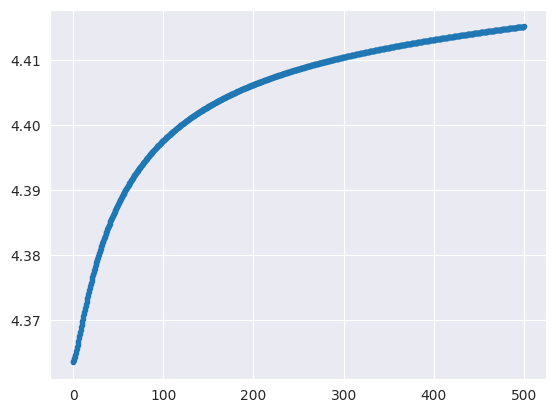

Optimal alpha  message: Maximum number of function calls reached.
 success: False
  status: 1
     fun: 4.363532051809559
       x: 0.00021499620094222815
     nit: 30
    nfev: 30


Validation not scaled data RMSE: 4.36353 with optimum alpha 0.00021499620094222815


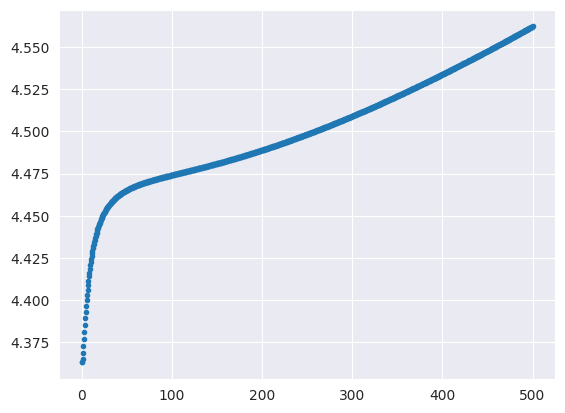

Optimal alpha  message: Solution found.
 success: True
  status: 0
     fun: 4.36277771148837
       x: 0.3140543683755845
     nit: 22
    nfev: 22


Validation standard scaled data RMSE: 4.36278 with optimum alpha 0.3140543683755845


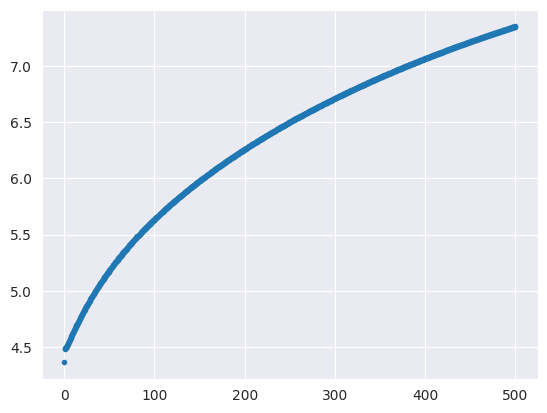

Optimal alpha  message: Maximum number of function calls reached.
 success: False
  status: 1
     fun: 4.3628428474707
       x: 0.0011948543684419338
     nit: 30
    nfev: 30


Validation min max scaled data RMSE: 4.36284 with optimum alpha 0.0011948543684419338


In [34]:
clf_opt_ridge = get_opt_ridge_model(Xtrain, Ytrain,  Xval, Yval)
RMSE_val_opt_ridge = metrics.mean_squared_error(Yval, clf_opt_ridge.predict(Xval), squared = False)
print(f'Validation not scaled data RMSE: {RMSE_val_opt_ridge:.5f} with optimum alpha {clf_opt_ridge.alpha}')

clf_opt_ridge_standard = get_opt_ridge_model(Xtrain_standard, Ytrain,  Xval_standard, Yval)
RMSE_val_opt_ridge_standard = metrics.mean_squared_error(Yval, clf_opt_ridge_standard.predict(Xval_standard), squared = False)
print(f'Validation standard scaled data RMSE: {RMSE_val_opt_ridge_standard:.5f} with optimum alpha {clf_opt_ridge_standard.alpha}')

clf_opt_ridge_min_max = get_opt_ridge_model(Xtrain_min_max, Ytrain, Xval_min_max, Yval)
RMSE_val_opt_ridge_min_max = metrics.mean_squared_error(Yval, clf_opt_ridge_min_max.predict(Xval_min_max), squared = False)
print(f'Validation min max scaled data RMSE: {RMSE_val_opt_ridge_min_max:.5f} with optimum alpha {clf_opt_ridge_min_max.alpha}')


#### Lasso
Lasso přidává penalizační člen do funkce nákladů, což vede k tomu, že některé váhy příznaků jsou nulové, čímž dochází k automatickému výběru příznaků
Jak můžeme vidět, tato volba má skoro stejné výsledky jak obyčejne hledání optimálního alpha

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

alphas = np.linspace(0.001,500,1000)

best_score_lasso = float('inf')
for alpha in alphas:
    selector = SelectFromModel(estimator=Lasso(alpha = alpha, max_iter = 10000)).fit(Xtrain, Ytrain)
    Xtrainsel = Xtrain.loc[:,selector.get_support()]
    Xvalsel = Xval.loc[:,selector.get_support()]
    clfLR = Ridge(alpha)
    clfLR.fit(Xtrainsel,Ytrain)
    
    rmse = metrics.mean_squared_error(Yval, clfLR.predict(Xvalsel), squared = False)
    if best_score_lasso > rmse:
        best_score_lasso = rmse
        
        

In [36]:
print(f'RMSE using Lasso: {best_score_lasso}')

RMSE using Lasso: 4.362583643789829


#### Odstranění přiznaků
Snad nejpomalejší a nejhorší možnost je vyzkoušet odstranit všechny kombinace nejvíce závislých sloupců, následně spočitat RMSE.
Kvůli tomu, všech kombinací je kolem 15000, prozkošení všech alf zabere 1 až 3 sekundy, celkově to bude trvat více než 5 hodin. 

Existuje další možnost RFE a je používána pro výběr nejdůležitějších příznaků v datasetu. Vyzkoušíme obyčejná a standard scaled data.
Z výsledku můžeme vidět, že ani RFE nepomohlo. 

In [37]:
from sklearn.feature_selection import RFE

alphas = np.linspace(0.1,500,1000)
best_rmse_rfe = float('inf')
features = None
for alpha in alphas:
    for n in range(1,20):
        ridge_model = Ridge(alpha=alpha)
        rfe = RFE(estimator=ridge_model, n_features_to_select=n)
        Xtrain_rfe = rfe.fit_transform(Xtrain, Ytrain)
        Xval_rfe = rfe.transform(Xval)
        ridge_model.fit(Xtrain_rfe, Ytrain)
        rmse = metrics.mean_squared_error(Yval, ridge_model.predict(Xval_rfe), squared=False)
        
        if best_rmse_rfe > rmse:
            features = rfe.feature_names_in_
            best_rmse_rfe = rmse
            print(f'{best_rmse_rfe}')


7.00292637151141
6.823875480616071
6.657632986443768
5.317339423202208
5.269864214568536
5.253931013946225
5.248998526173702
5.064390429673459
4.931672289569378
4.84703017024002
4.845281629485261
4.4424671934561015
4.3989939353546905
4.397468670044145
4.3719330700804795
4.362620332588235
4.362525883693944


In [38]:
alphas = np.linspace(0.1,500,1000)
best_rmse_rfe = float('inf')
features = None
for alpha in alphas:
    for n in range(1,20):
        ridge_model = Ridge(alpha=alpha)
        rfe = RFE(estimator=ridge_model, n_features_to_select=n)
        Xtrain_rfe = rfe.fit_transform(Xtrain_standard, Ytrain)
        Xval_rfe = rfe.transform(Xval_standard)
        ridge_model.fit(Xtrain_rfe, Ytrain)
        rmse = metrics.mean_squared_error(Yval, ridge_model.predict(Xval_rfe), squared=False)

        if best_rmse_rfe > rmse:
            features = rfe.feature_names_in_
            best_rmse_rfe = rmse
            print(f'{best_rmse_rfe}')


9.844426013172821
9.289227368419104
6.81339658107224
5.474630400198305
4.84546174535796
4.7489370733230905
4.618469560100818
4.5452302934250435
4.4618814394624895
4.43627208293269
4.433997329217949
4.391412415134045
4.375504390146941
4.36636749608761
4.365141983049314
4.362110392900139


### Výsledná predikce Rigde regression RMSE a MAE

In [39]:
best_alpha = 0.3140543683755845
best_ridge = Ridge(alpha = best_alpha)
best_ridge.fit(Xtrain_standard, Ytrain)
print(f'RMSE for best Ridge regression paramaters: {metrics.mean_squared_error(Yval, best_ridge.predict(Xval_standard), squared=False)}')
print(f'MAE for best Ridge regression paramaters: {metrics.mean_absolute_error(Yval, best_ridge.predict(Xval_standard))}')

RMSE for best Ridge regression paramaters: 4.36277771148837
MAE for best Ridge regression paramaters: 3.1647546574723715


## Adaboost

* Vysoká přesnost
* Vyhýbání se přeškolení: Adaptivní váhy pomáhají vyhnout se přeškolení, což je užitečné při práci s citlivými daty.
* Vyhýbání se chybám
* Použitelnost na různých typech dat

In [40]:
from sklearn.ensemble import AdaBoostRegressor
import sklearn.metrics as metrics

param_grid = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(2,9)
}

param_comb = ParameterGrid(param_grid)

val_metric = []
for params in param_comb:
    dt_depth = params.pop("max_depth")
    params["estimator"] = DecisionTreeRegressor(max_depth = dt_depth)
    dt = AdaBoostRegressor(**params, random_state = 42).fit(Xtrain, Ytrain)
    val_metric.append(metrics.mean_squared_error(Yval, dt.predict(Xval), squared = False))

best_params = param_comb[np.argmin(val_metric)]
print(f"We found the best params {best_params} with validation data with RMSE {min(val_metric):.5f}.")

val_metric_standard = []
for params in param_comb:
    dt_depth = params.pop("max_depth")
    params["estimator"] = DecisionTreeRegressor(max_depth = dt_depth)
    dt = AdaBoostRegressor(**params, random_state = 42).fit(Xtrain_standard, Ytrain)
    val_metric_standard.append(metrics.mean_squared_error(Yval, dt.predict(Xval_standard), squared = False))

best_params_standard = param_comb[np.argmin(val_metric_standard)]
print(f"\nWe found the best params {best_params_standard} with validation standard scaled data with RMSE {min(val_metric_standard):.5f}.")

val_metric_min_max = []
for params in param_comb:
    dt_depth = params.pop("max_depth")
    params["estimator"] = DecisionTreeRegressor(max_depth = dt_depth)
    dt = AdaBoostRegressor(**params, random_state = 42).fit(Xtrain_min_max, Ytrain)
    val_metric_min_max.append(metrics.mean_squared_error(Yval, dt.predict(Xval_min_max), squared = False))

best_params_min_max = param_comb[np.argmin(val_metric_min_max)]
print(f"\nWe found the best params {best_params_min_max} with validation min max scaled data with RMSE {min(val_metric_min_max):.5f}.")


We found the best params {'n_estimators': 70, 'max_depth': 8} with validation data with RMSE 2.18310.

We found the best params {'n_estimators': 80, 'max_depth': 8} with validation standard scaled data with RMSE 2.17219.

We found the best params {'n_estimators': 80, 'max_depth': 8} with validation min max scaled data with RMSE 2.20198.


Dostali jsme zatím nejlepší výsledek ze všech modelu. Spočítáme RMSE a MAE nejlepšího modelu.

In [41]:
tree = DecisionTreeRegressor(max_depth=8)
adaboost = AdaBoostRegressor(estimator=tree, n_estimators=80, random_state=42).fit(Xtrain_standard, Ytrain)
print(f'RMSE for best Adaboost hyperparemeters: {metrics.mean_squared_error(Yval, adaboost.predict(Xval_standard), squared = False)}')
print(f'MAE for best Adaboost hyperparemeters: {metrics.mean_absolute_error(Yval, adaboost.predict(Xval_standard))}')

RMSE for best Adaboost hyperparemeters: 2.1721877943924808
MAE for best Adaboost hyperparemeters: 1.4635573101689106


## Odhad jakou chybu (RMSE) lze očekávat na nových datech
Vybrali jsme Adaboost s hyperparametry max_depth = 8 a n_estimators = 80. Odhadněme testovácí chybu, tedy na datech, který náš model ještě neviděl.
Jelikož jsme transformovali data pomocí StandardScaler() a máme ho uloženého v proměnne, musíme nejdříve provést standardizaci.

In [42]:
Xtest_standard = standard_scaler.transform(Xtest)
print(f"Test RMSE for best model is: {metrics.mean_squared_error(Ytest, adaboost.predict(Xtest_standard), squared=False)}")

Test RMSE for best model is: 2.091729969377682


## Finální predikce

In [46]:
def replace_nan_mean_copied(dataset, column):
    # get mean values depending on training data a fill NaN with mean of this current country to get accurate value as possible
    # because for example alcohol in Czech republic and muslim country will not be as accurate as it could have been
    # if country whole column is null then replace it with mean from whole train data in this column

    mean_values = Xtrain_copy.groupby('Country')[column].mean()
    overall_mean = Xtrain_copy[column].mean()

    for country, mean_value in mean_values.items():
        if not pd.isnull(mean_value):
            mask = (dataset['Country'] == country) & (dataset[column].isnull())
            dataset.loc[mask, column] = mean_value
        else:
            mask = (dataset['Country'] == country) & (dataset[column].isnull())
            dataset.loc[mask, column] = overall_mean

In [49]:
evaluation = pd.read_csv("evaluation.csv")
evaluation_countries = evaluation.Country
evaluation_years = evaluation.Year
evaluation = pd.get_dummies(evaluation, columns=['Status'], drop_first=True)

columns_with_null = evaluation.columns[evaluation.isnull().any()].tolist()
for column_name in columns_with_null:
    replace_nan_mean_copied(evaluation, column_name)

evaluation = evaluation.drop('Country', axis=1)
evaluation = standard_scaler.transform(evaluation)
evaluation = pd.DataFrame(evaluation, columns=Xtrain.columns)


predictions = adaboost.predict(evaluation)   

In [51]:
results_df = pd.DataFrame({
    'Country': evaluation_countries,
    'Year': evaluation_years,
    'Life expectancy': predictions
})
results_df.to_csv('results.csv', index=False)